## EDA Considering behavior of target and features over time

In [2]:
# importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
# loading dataset
df = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv', parse_dates= ['TIMESTAMP'])#,
                    #index_col= 'TIMESTAMP' )

Target over hours over all windfarms in average.

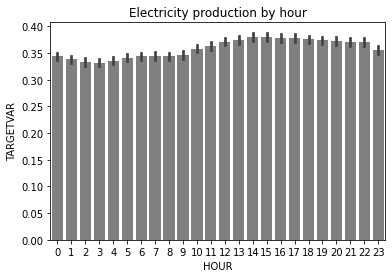

In [13]:
sns.barplot(data = df, x = 'HOUR', y = 'TARGETVAR', color='gray')
plt.title('Electricity production by hour')
plt.show()

Target over hour for every windfarm

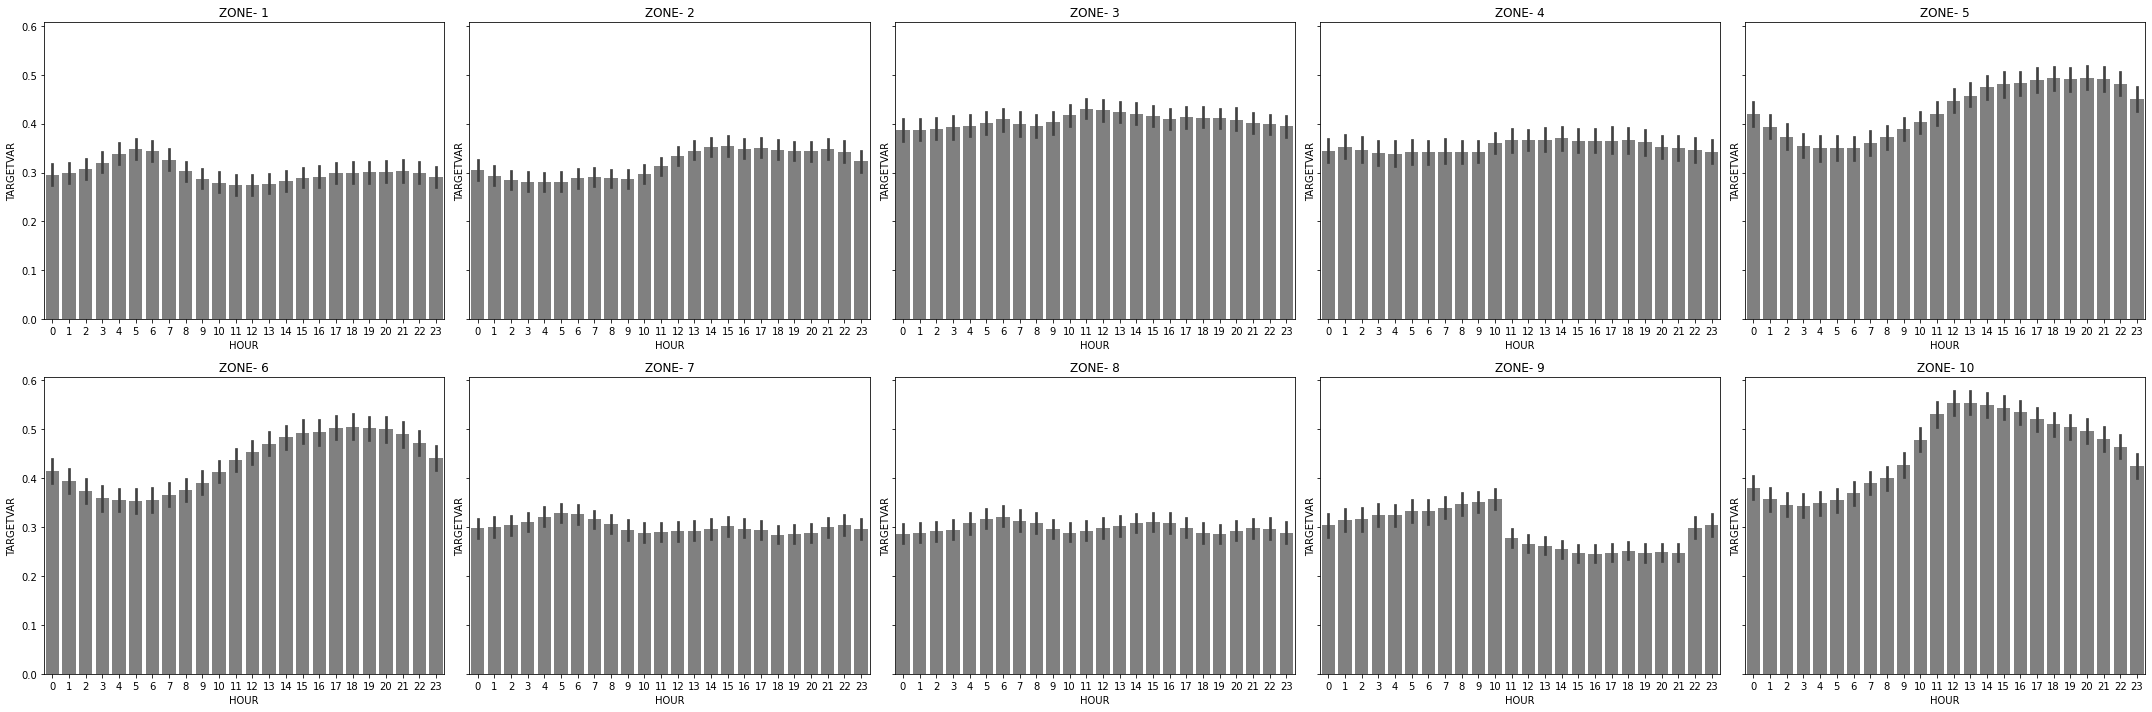

In [14]:
fig, ax = plt.subplots(2,5,figsize=(30,10),sharey=True)
ax = ax.ravel()
for zone in range(1,11):
    sns.barplot(data = df[df.ZONEID==zone], x = 'HOUR', y = 'TARGETVAR', color='gray', ax=ax[zone - 1])
    ax[zone - 1].set_title('ZONE- {}'.format(zone))
fig.tight_layout()


Target over month for every windfarm

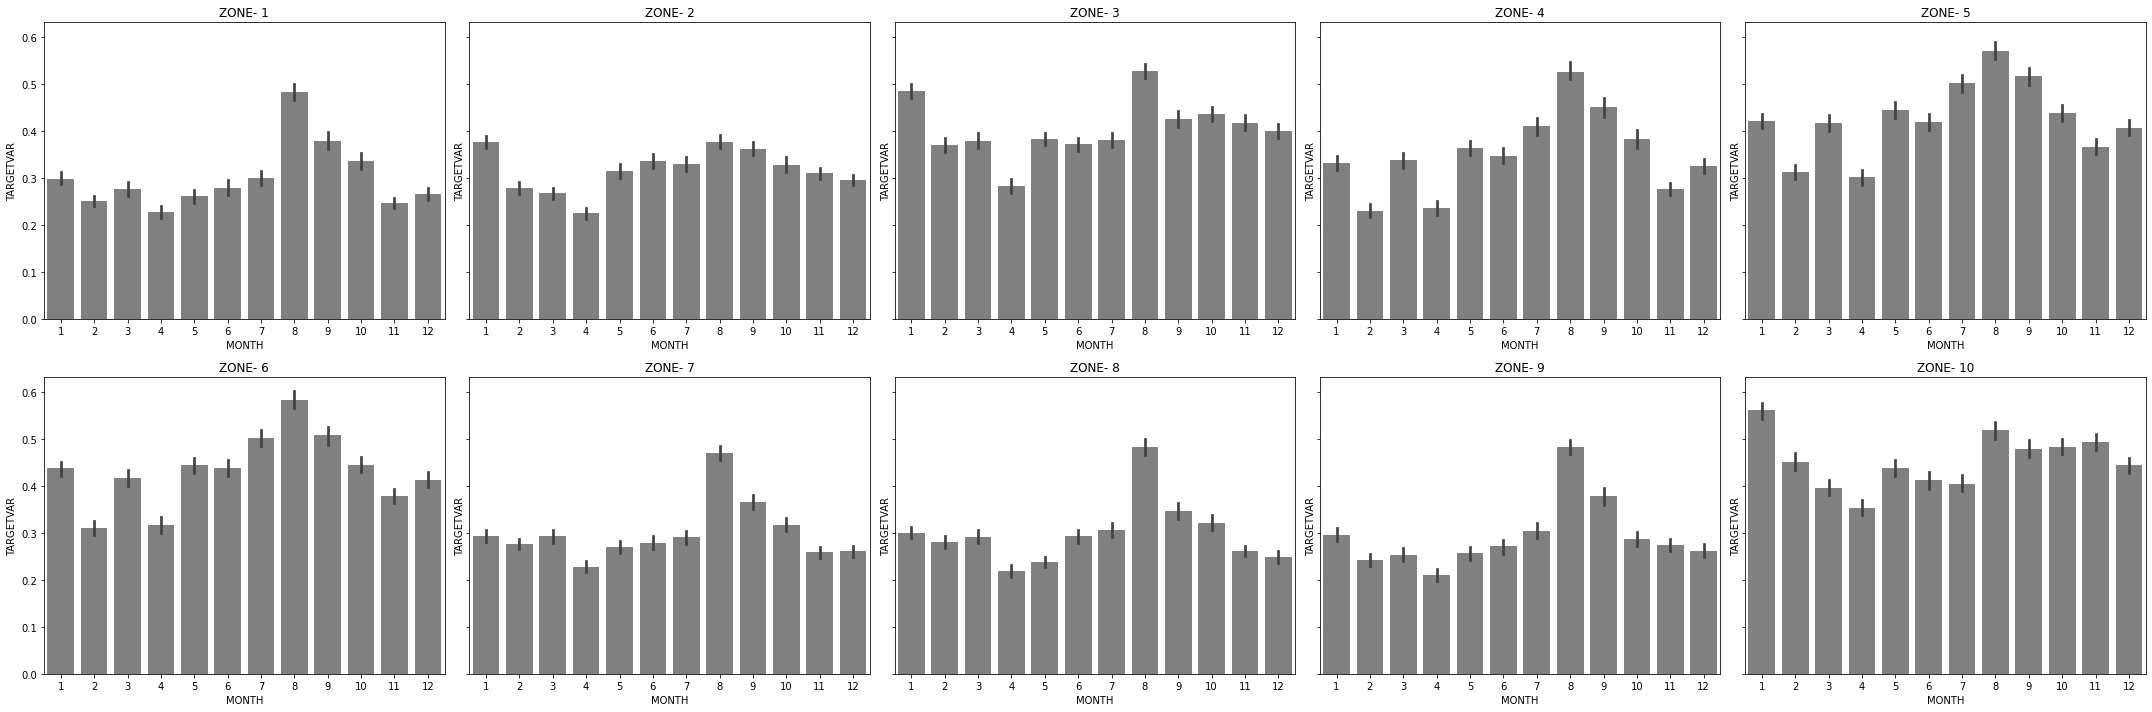

In [15]:
fig, ax = plt.subplots(2,5,figsize=(30,10),sharey=True)
ax = ax.ravel()
for zone in range(1,11):
    sns.barplot(data = df[df.ZONEID==zone], x = 'MONTH', y = 'TARGETVAR', color='gray', ax=ax[zone - 1])
    ax[zone - 1].set_title('ZONE- {}'.format(zone))
fig.tight_layout()

Plotting electricity production by day of the week


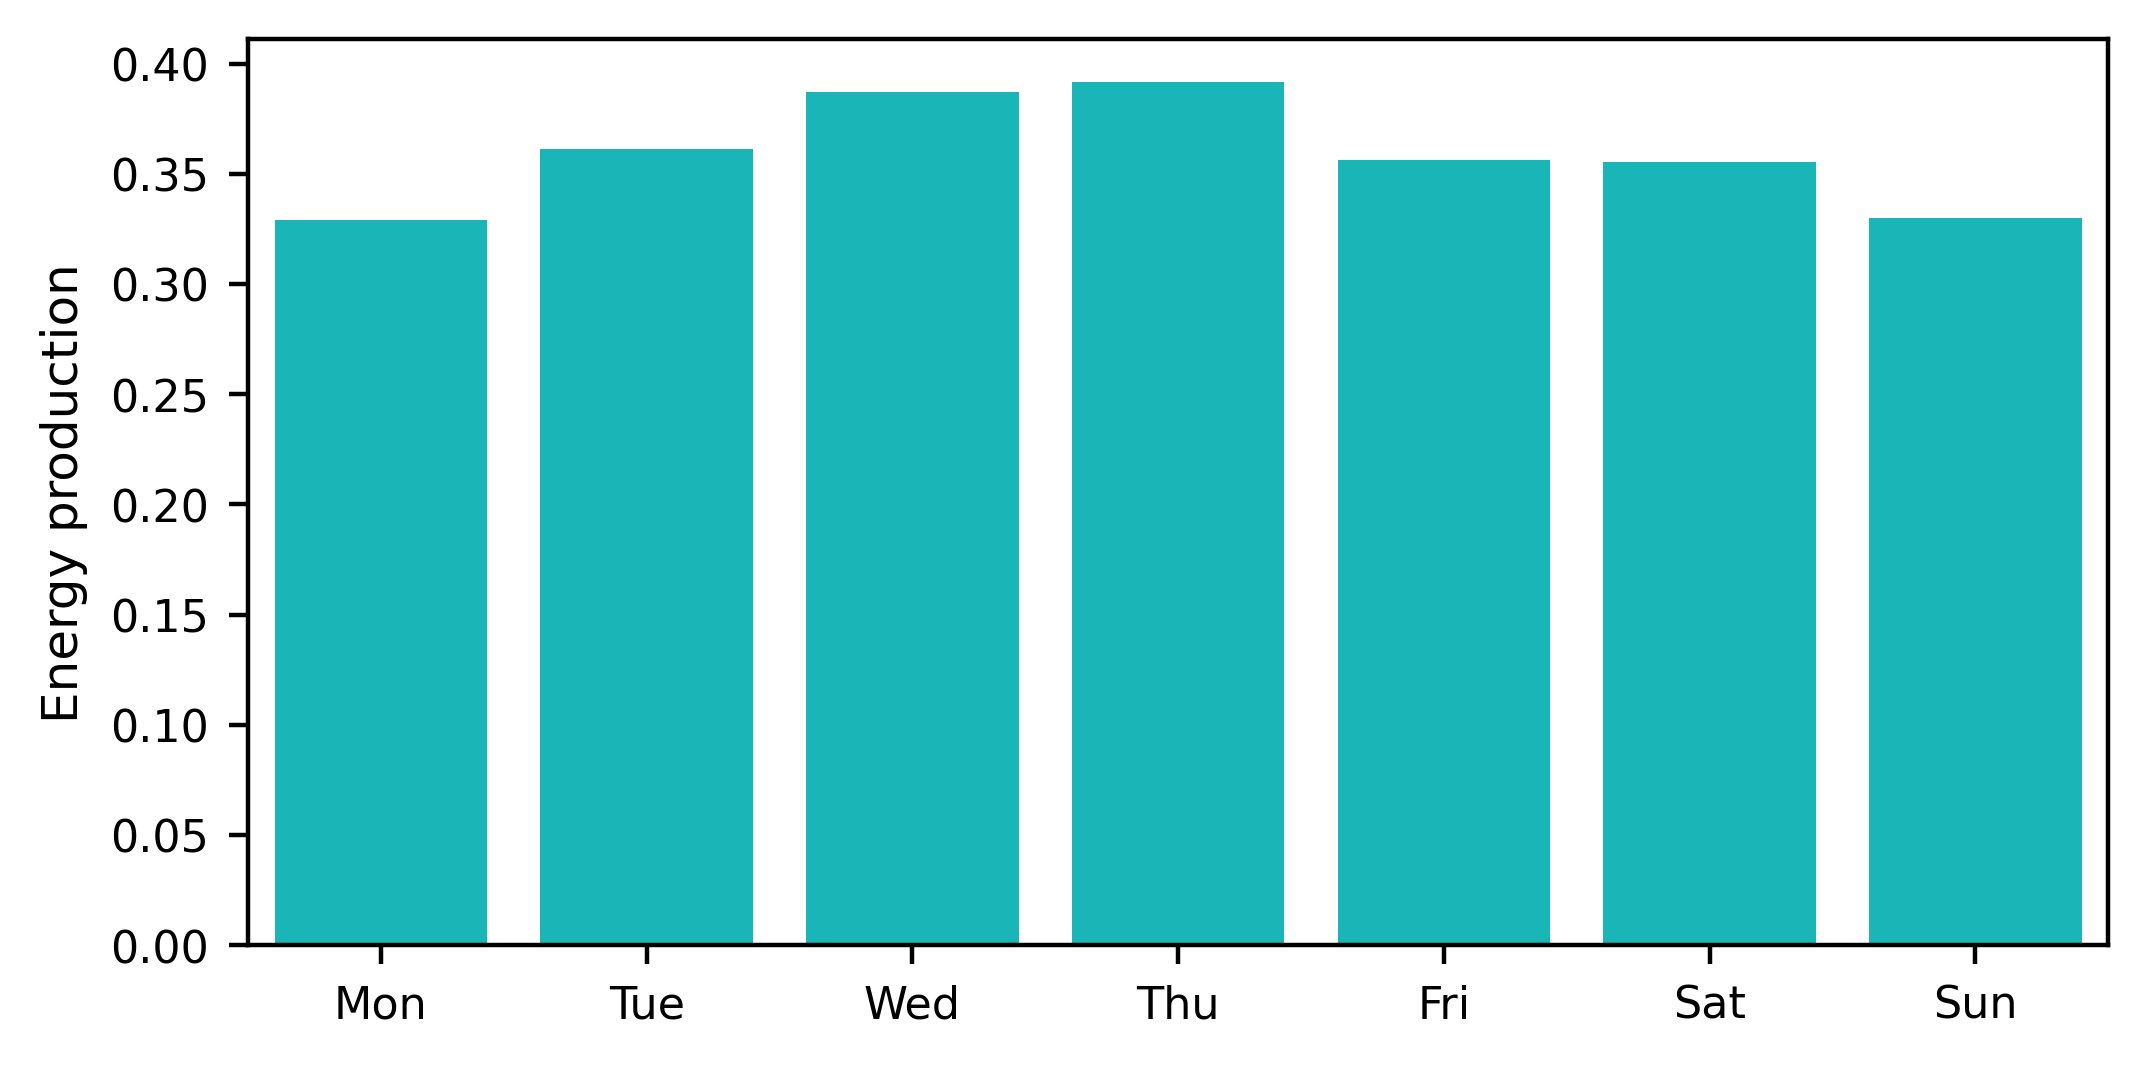

In [16]:
fontsize = 8
df['weekday'] = df.TIMESTAMP.dt.weekday

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_dict = {i:key for i,key in enumerate(weekdays)}

fig, ax = plt.subplots(figsize = (6,3), dpi = 400)
sns.barplot(data = df, x = 'weekday', y = 'TARGETVAR', color = 'darkturquoise', errcolor='gray',ax = ax, ci = None)
ax.tick_params(axis='both', labelsize=fontsize)
plt.ylabel('Energy production', fontsize = fontsize + 1)
plt.xlabel('')
ax.set_xticklabels(weekdays)
plt.show()



Plotting energy production in every season

In [32]:
# seasons in Australia
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
season_dict = {1: "Summer", 2:"Autumn", 3:"Winter", 4:"Spring"}
# // is operator to do integer division (i.e., quotient without remainder)
month_season_dict = {month_idx + 1: season_dict[month_idx // 3 + 1] for month_idx, month in enumerate(months)}
df['SEASON'] = df.MONTH.apply(lambda x: month_season_dict[x])

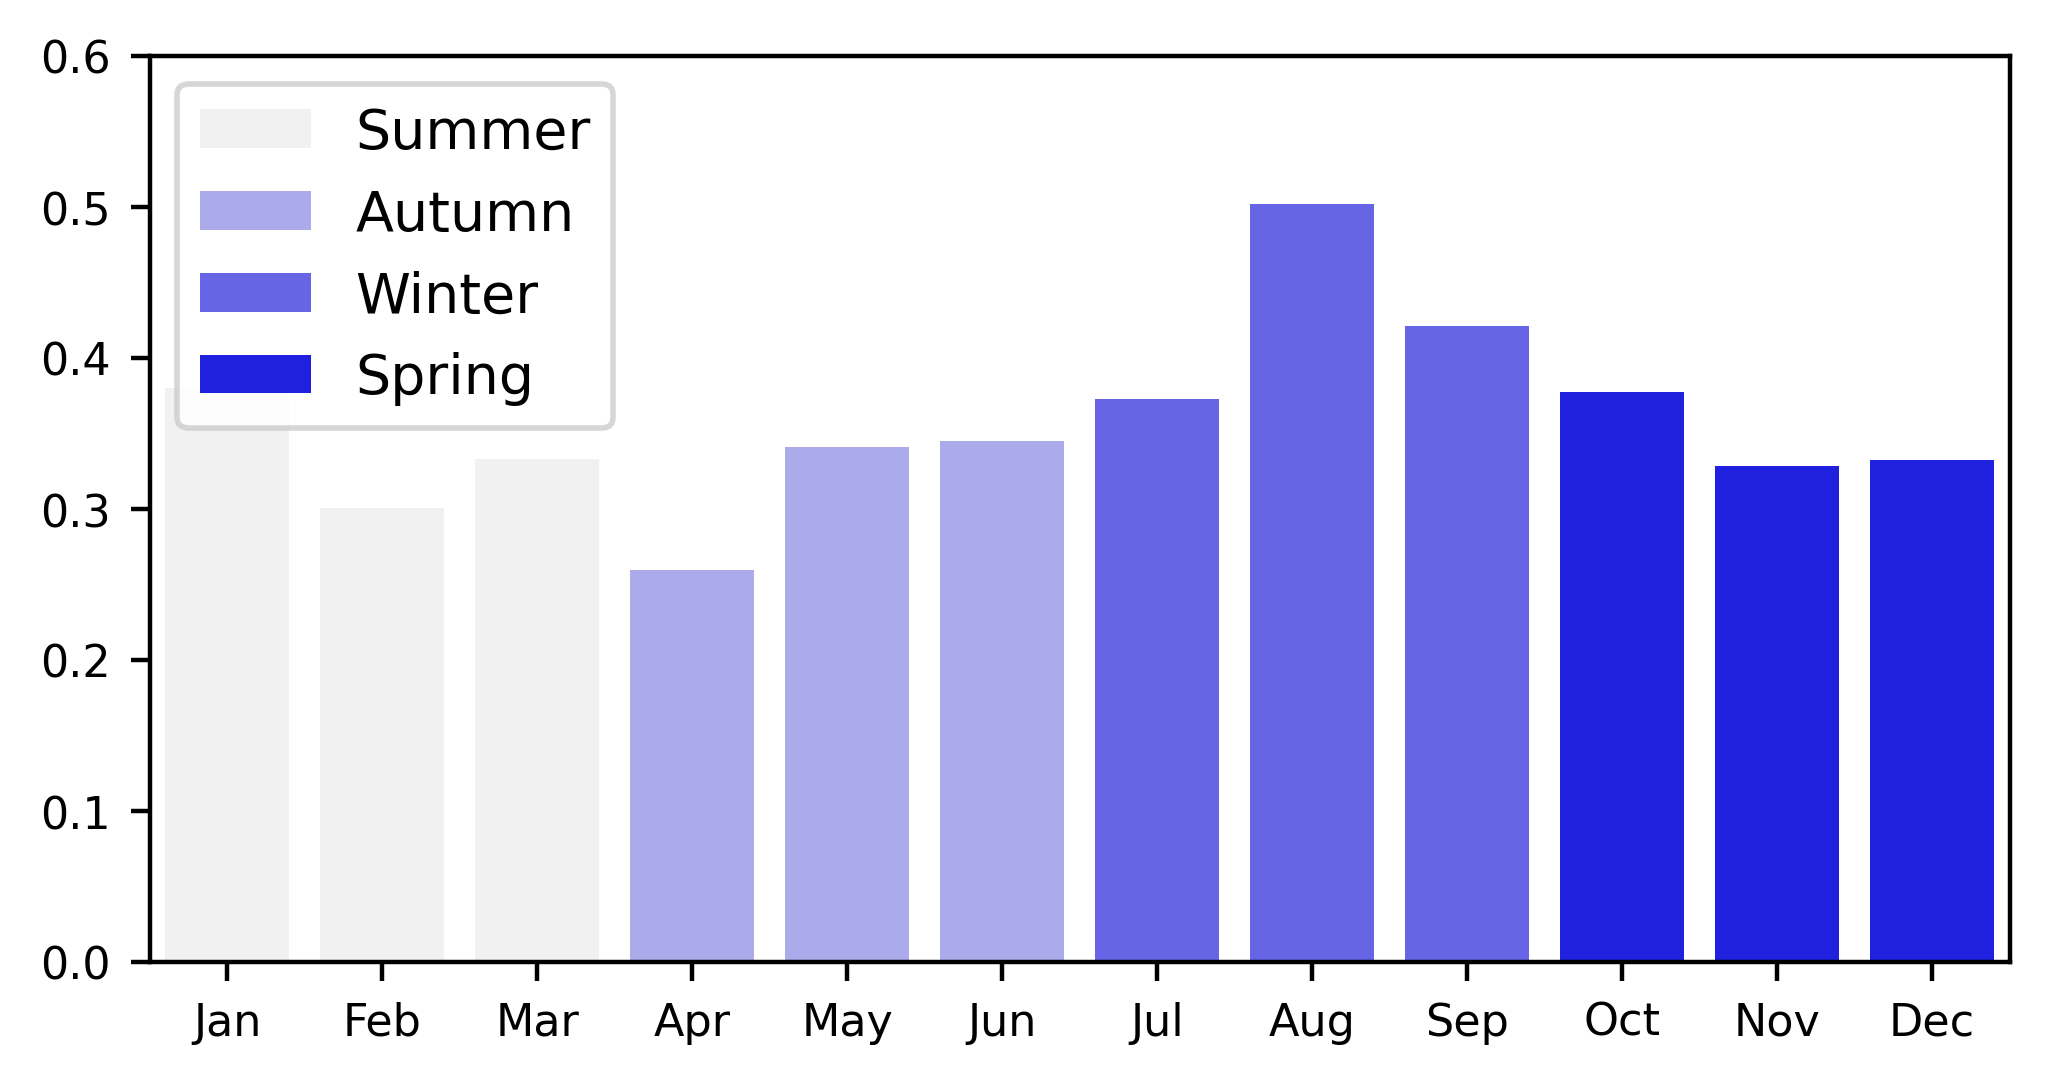

In [36]:
fig, ax = plt.subplots(figsize = (6,3), dpi = 400)
sns.barplot(data = df, x = 'MONTH', y = 'TARGETVAR', hue = 'SEASON', color='blue', ax = ax, ci=None, dodge=False)
ax.tick_params(axis='both', labelsize=fontsize)
plt.ylabel('')
plt.xlabel('')
plt.ylim([0,0.6])
plt.legend(loc = 'upper left', bbox_to_anchor=(0, 0, 1, 1))
ax.set_xticklabels(months)
plt.show()


In average the energy production is highest in Winter. Considering weekdays, the average energy production is highest in the middle
of the week, i.e. Wednesdays and Thursdays, and during the day, in the early afternoon, between 2:00 and 3:00 pm.